# **MUSIC ( SONG ) POPULATORY PREDICTION MODEL**

# **`Description of the project`:**
The "Song Popularity Prediction Model" project aims to predict how popular a song will be. By analyzing various factors like artist, genre, BPM, etc. the model can help identify which songs are likely to become hits and which ones may not be as popular. This project can be useful for musicians, record labels, and music platforms to understand audience preferences and make informed decisions about promoting and recommending songs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('song_data.csv')

In [2]:
df.head()


,title,popularity,duration,acousticness,danceability,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,8,0.0589,-4.095,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,3,0.1080,-6.407,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0,0.2550,-7.828,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0,0.1020,-4.938,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,10,0.1130,-5.065,0.0313,172.011,4,0.574


# **`Explaination of Columns`:**

column 1 - **Title** : This column consist of title (name) of the song by which it is known or will be known.

Column 2 - **Popularity** : This column contains measure of popularity,which basically tells us how much popular the song  is.

column 3 - **Duration** : This column consist of the Duration of the song. Duration is basically the length of the song and it is measured in mili-seconds.

column 4 - **Acousticness** : This column consist of the measure of acousticness .Acousticness means how acoustic the song is.

column 5 -**Danceability** : This column consist of the measure that determines the ease with which a person could dance to a song over the course of the whole song.

column 6 - **Energy**: This column consist of the measure of how much energetic the song is.

column 7 - **Key** :This column contains the key of the song. It determines the set of notes and chords that are used most prominently in the song.
There are basically 12 keys in music, i.e [ C,C#,D,D#,E,F,F#,G,G#,A,A#,B]
here,
C=0 , C#=1, ....., B=11


column 8- **Liveness** : This column consist of measure of probablity of how much the song was recorded with the live instruments.Higher liveness values represent an increased probability that the track was performed live.

column 9- **Loudness**: This column consist of the measure of loudness of the song. its is basically measured in decibels (db). Basically loudness is a perception that determines how much sound pressure a particular song is emitting at a given time.

Column 10 - **speechiness** : This column consist of speechiness of the song.
Speechness is basically the presence of spoken words in a track.

column11 - **Tempo** : This column consist of  tempo of the song.
Tempo is basically the speed of the song  which is  measured in 'bpm'( beats per minute).

column 12 - **time_signature** :This column contain time signature of the song.
In music, a time signature is a notation that indicates the rhythm and structure of a musical piece.
For example, in a common time signature like 4/4:
The top number "4" means there are four beats in each measure.
The bottom number "4" indicates that a quarter note (1/4 of a whole note) receives one beat.


column 13 - **Valence** : This column  consist of valence of the song. Basically valence describes the musical positiveness conveyed by a track.
Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).































In [3]:
df.tail()

,title,popularity,duration,acousticness,danceability,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
18830,Let It Breathe,60,159645,0.893,0.500,0.151,11,0.111,-16.107,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765,0.495,0.161,11,0.105,-14.078,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0,0.125,-12.222,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,3,0.119,-12.020,0.0328,106.063,4,0.323
18834,Up to Me,60,193533,0.911,0.640,0.381,4,0.104,-11.790,0.0302,91.490,4,0.581


# **`Cleaning data :`**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           18835 non-null  object 
 1   popularity      18835 non-null  int64  
 2   duration        18835 non-null  int64  
 3   acousticness    18835 non-null  float64
 4   danceability    18835 non-null  float64
 5   energy          18835 non-null  float64
 6   key             18835 non-null  int64  
 7   liveness        18835 non-null  float64
 8   loudness        18835 non-null  float64
 9   speechiness     18835 non-null  float64
 10  tempo           18835 non-null  float64
 11  time_signature  18835 non-null  int64  
 12  valence         18835 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 1.9+ MB


In [5]:
df.isnull().sum()

title             0
popularity        0
duration          0
acousticness      0
danceability      0
energy            0
key               0
liveness          0
loudness          0
speechiness       0
tempo             0
time_signature    0
valence           0
dtype: int64

Since the data do not have any null values. We do not need to clean the data, the data is already clean.

# **`Dropping Uneccesary Columns :`**

We are Dropping here 'title' column ,since the title of the song do not contribute in the popularity of the song ,i.e our target of the model.
Therefore it will not affect our analysis.

In [6]:
df=df.drop(["title"],axis=1)
df.head()


,popularity,duration,acousticness,danceability,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,73,262333,0.005520,0.496,0.682,8,0.0589,-4.095,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,3,0.1080,-6.407,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0,0.2550,-7.828,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0,0.1020,-4.938,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,10,0.1130,-5.065,0.0313,172.011,4,0.574


# **`Checking and Dropping Duplicated rows :`**

In [7]:
df.duplicated(keep='first').sum()


3911

There are  3911 duplicate rows in the dataset, excluding the first occured duplicate rows. So we need to remove the duplicate rows from the dataset.

In [8]:
df=df.drop_duplicates(keep='first')
df.count()


popularity        14924
duration          14924
acousticness      14924
danceability      14924
energy            14924
key               14924
liveness          14924
loudness          14924
speechiness       14924
tempo             14924
time_signature    14924
valence           14924
dtype: int64

# **`Data Visualization and analysis :`**

<Axes: >

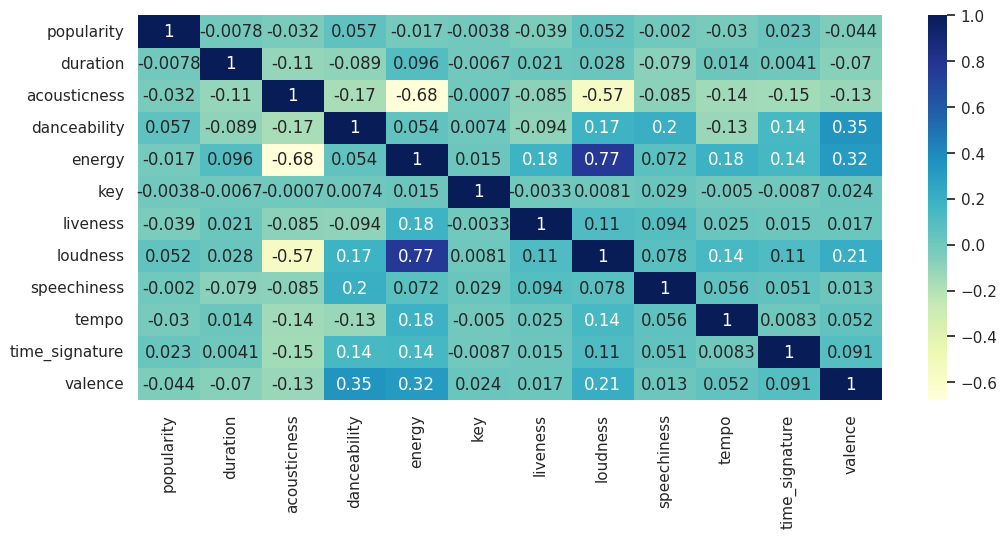

In [9]:
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

**Points to be noted :**

1) From the visualisation, it is seen that, popularity of the song is mostly correlated with danceabilty and loudness of  the song .

2) Loudness and Energy are highly correlated.

3)Valence is highly correalted with danceability and energy.

# **`Detecting Outliers :`**

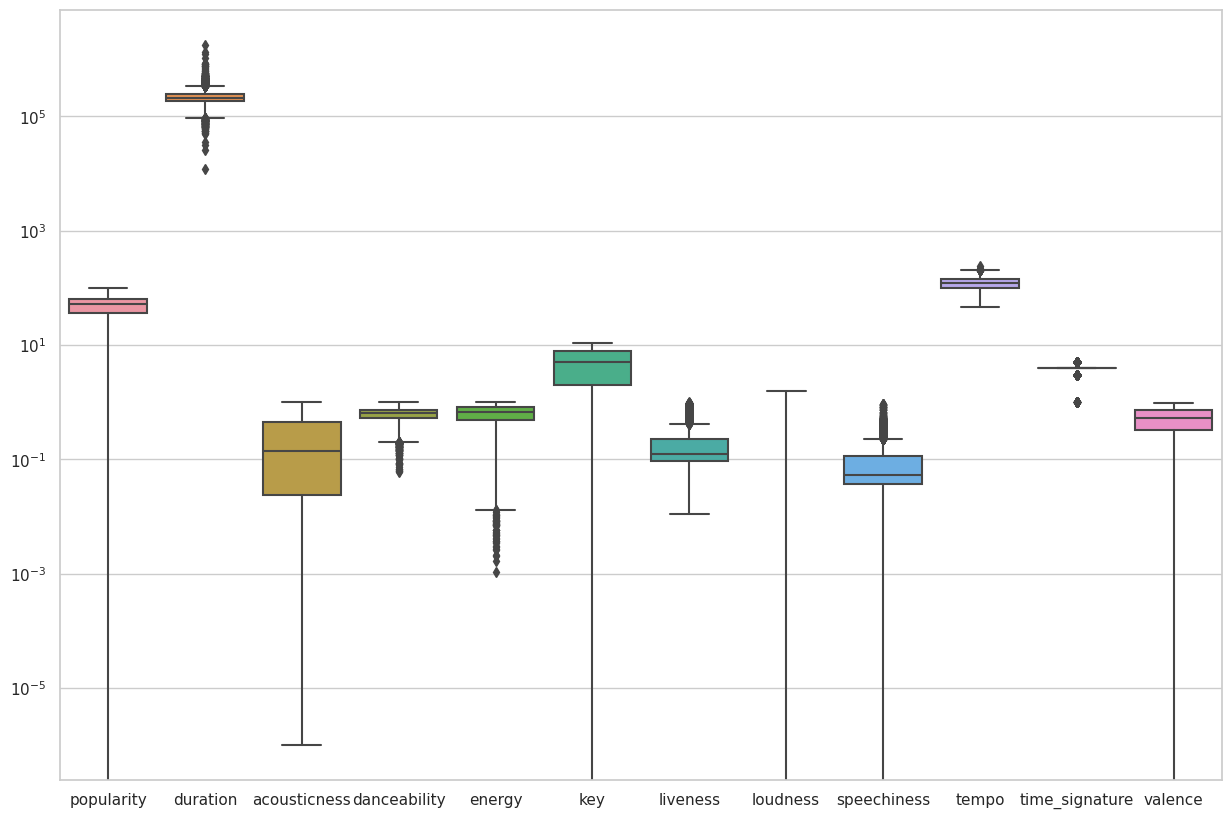

In [10]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.yscale('log')
plt.show()

It is identified that some of the columns have outliers, so we need to remove the outliers.

In [11]:
#Removing outliers
Q1 =df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
df.count()

popularity        10651
duration          10651
acousticness      10651
danceability      10651
energy            10651
key               10651
liveness          10651
loudness          10651
speechiness       10651
tempo             10651
time_signature    10651
valence           10651
dtype: int64

# **`Preprocessing :`**

In simple words, preprocessing is like getting the data ready for the machine learning model to understand and learn from. It includes tasks like removing missing values, scaling the data to a common range, encoding categorical variables, and other steps to make the data more manageable and meaningful for the model. By doing this, we help the model perform better and make more accurate predictions.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10651 entries, 0 to 18834
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10651 non-null  int64  
 1   duration        10651 non-null  int64  
 2   acousticness    10651 non-null  float64
 3   danceability    10651 non-null  float64
 4   energy          10651 non-null  float64
 5   key             10651 non-null  int64  
 6   liveness        10651 non-null  float64
 7   loudness        10651 non-null  float64
 8   speechiness     10651 non-null  float64
 9   tempo           10651 non-null  float64
 10  time_signature  10651 non-null  int64  
 11  valence         10651 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 1.1 MB


Here, datatypes all columns are  numeric (float/int), Therefore we  don't need to convert any column into numeric datatype.



# **`Splitting the data into x and y:`**

Splitting the data into X and y refers to separating the input features and the target variable from the dataset.

'x' represents the input features or independent variables. These are the characteristics or attributes of the data that are used to make predictions.

'y' represents the target variable or dependent variable. This is the value we want to predict or classify based on the input features.

In [14]:
x=df.iloc[::,1:]
x.head()

,duration,acousticness,danceability,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,262333,0.005520,0.496,0.682,8,0.0589,-4.095,0.0294,167.060,4,0.474
1,216933,0.010300,0.542,0.853,3,0.1080,-6.407,0.0498,105.256,4,0.370
2,231733,0.008170,0.737,0.463,0,0.2550,-7.828,0.0792,123.881,4,0.324
3,216933,0.026400,0.451,0.970,0,0.1020,-4.938,0.1070,122.444,4,0.198
4,223826,0.000954,0.447,0.766,10,0.1130,-5.065,0.0313,172.011,4,0.574


Here, 'Popularity' will be y i.e target, since we want to predict the popularity of the song depending on the other features of the song ,which will be x

In [15]:
y=df.iloc[:,0]
y

0        73
1        66
2        76
3        74
4        56
         ..
18827    55
18829    62
18831    60
18832    23
18834    60
Name: popularity, Length: 10651, dtype: int64

# **`Model Training :`**
Here, we will be using ' Linear regression'.
Since, we use linear regression when we want to predict a continuous numerical value (e.g., predicting house prices, sales revenue) based on input features.
It finds a linear relationship between the input features and the target variable.

Here, since we don't have much data , we have to give whole x and whole y to train the model.

In [16]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [18]:
ypred=model.predict(xtest) #testing of model
ypred

array([49.00295949, 46.06855765, 53.83224803, ..., 53.68985742,
       44.76186357, 48.00607003])

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# from sklearn.metrics import classification_report,confusion_matrix

In [20]:
r2_score(ytest,ypred)

0.017788064519834834

In [21]:
mean_absolute_error(ytest,ypred)

16.208031710292644

In [22]:
mean_squared_error(ytest,ypred)


420.4888953266174

# **`New Precdiction :`**

In [24]:
def new_prediction():
  dr=float(input('Enter duration of the song : '))
  ac=float(input('Enter acousticness of the song : '))
  dn=float(input('Enter danceability of the song : '))
  en=float(input('Enter energy of the song : '))
  key=float(input('Enter the key of the song : '))
  lv=float(input('Enter the liveness of the song : '))
  ld=float(input('Enter the loudness of the song : '))
  sness=float(input('Enter the speechiness of the song : '))
  tm=float(input('Enter the tempo : '))
  ts=float(input('Enter the time signature : '))
  vl=float(input('Enter the valence : '))
  return([[dr,ac,dn,en,key,lv,ld,sness,tm,ts,vl]])


In [25]:
pop_song=model.predict(new_prediction())
print(f'Popularity of the song : {pop_song}')


Enter duration of the song : 262333
Enter acousticness of the song : 0.005520
Enter danceability of the song : 0.496
Enter energy of the song : 0.682
Enter the key of the song : 8
Enter the liveness of the song : 0.0586
Enter the loudness of the song : -4.095
Enter the speechiness of the song : 0.0294
Enter the tempo : 167.060
Enter the time signature : 4
Enter the valence : 0.474
Popularity of the song : [52.82724955]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **`Conclusion :`**


In conclusion, the Song Popularity Prediction project aimed to explore the factors influencing song popularity and develop a predictive model to forecast a song's potential success. Through the process of Exploratory Data Analysis (EDA), we examined various features such as duration, loudeness, danceabilty, etc. to understand their impact on song popularity.

In summary, this project not only provided valuable insights into the dynamics of song popularity but also demonstrated the potential of machine learning in predicting the commercial success of songs.
